In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [265]:
data = pd.read_csv('data_banknote_authentication.csv')

data['color'] = data.apply(lambda x: 'green' if x['class'] == 0 else 'red', axis=1)
f1_mean = data.groupby('class')['variance'].mean().tolist()
f1_std = data.groupby('class')['variance'].std().tolist()
f1_all_mean = data['variance'].mean()
f1_all_std = data['variance'].std()
f2_mean = data.groupby('class')['skewness'].mean().tolist()
f2_std = data.groupby('class')['skewness'].std().tolist()
f2_all_mean = data['skewness'].mean()
f2_all_std = data['skewness'].std()
f3_mean = data.groupby('class')['curtosis'].mean().tolist()
f3_std = data.groupby('class')['curtosis'].std().tolist()
f3_all_mean = data['curtosis'].mean()
f3_all_std = data['curtosis'].std()
f4_mean = data.groupby('class')['entropy'].mean().tolist()
f4_std = data.groupby('class')['entropy'].std().tolist()
f4_all_mean = data['entropy'].mean()
f4_all_std = data['entropy'].std()

dic = [
    {'f1_mean':f1_mean[0],'f1_std':f1_std[0],'f2_mean':f2_mean[0],'f2_std':f2_std[0],'f3_mean':f3_mean[0],
     'f3_std':f3_std[0],'f4_mean':f4_mean[0],'f4_std':f4_std[0]},
    {'f1_mean':f1_mean[1],'f1_std':f1_std[1],'f2_mean':f2_mean[1],'f2_std':f2_std[1],'f3_mean':f3_mean[1],
     'f3_std':f3_std[1],'f4_mean':f4_mean[1],'f4_std':f4_std[1]},
    {'f1_mean':f1_all_mean,'f1_std':f1_all_std,'f2_mean':f2_all_mean,'f2_std':f2_all_std,'f3_mean':f3_all_mean,
     'f3_std':f3_all_std,'f4_mean':f4_all_mean,'f4_std':f4_all_std}
]

result = pd.DataFrame(dic, index=list('01a'))

print(result)#question1

    f1_mean    f1_std   f2_mean    f2_std   f3_mean    f3_std   f4_mean  \
0  2.276686  2.019348  4.256627  5.138792  0.796718  3.239894 -1.147640   
1 -1.868443  1.881183 -0.993576  5.404884  2.148271  5.261811 -1.246641   
a  0.433735  2.842763  1.922353  5.869047  1.397627  4.310030 -1.191657   

     f4_std  
0  2.125077  
1  2.070984  
a  2.101013  


In [266]:
X = data[['variance','skewness','curtosis','entropy']].values
Y = data['class'].values

X_train ,X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.5 ,random_state =3)


In [267]:

predict_list_my_class = []
for i in X_test:
    if (i[0] > 0) and ( i[1] > 5) and ( i[2] < 8):
        predict_list_my_class.append(0)
    else:
        predict_list_my_class.append(1)

TP = 0
FP = 0
TN = 0
FN = 0
for j in range(len(predict_list_my_class)):
    if predict_list_my_class[j] == 0 and Y_test[j] == 0:
        TP+=1
    elif predict_list_my_class[j] == 0 and Y_test[j] == 1:
        FP+=1
    elif predict_list_my_class[j] == 1 and Y_test[j] == 1:
        TN+=1
    elif predict_list_my_class[j] == 1 and Y_test[j] == 0:
        FN+=1

    
dic1 = {'TP':TP,'FP':FP,'TN':TN,'FN' : FN,'accuracy':(TP+TN)/len(predict_list_my_class),'TPR' :TP/(TP+FN),'TNR': TN/(TN+FP)}
result = pd.DataFrame(dic1,index = ['result'])

print(result)#question2
print('higher accuracy on identifying real bills')
print('my accuracy is better than 50%')


         TP  FP   TN   FN  accuracy       TPR  TNR
result  160   0  301  225  0.672012  0.415584  1.0
higher accuracy on identifying real bills
my accuracy is better than 50%


In [268]:
scaler = StandardScaler().fit(X)
X = scaler.transform (X)
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.5 ,random_state =3)

In [269]:


accuracy_list = []
for i in [3,5,7,9,11]:
    knn_classifier = KNeighborsClassifier (n_neighbors =i)
    knn_classifier.fit(X_train , Y_train.ravel())
    pred_k = knn_classifier.predict(X_test)
    accuracy_list.append (np. mean ( pred_k == Y_test ))
    print('k = %d,accuracy = %f'%(i,np.mean(pred_k == Y_test)))



k = 3,accuracy = 0.998542
k = 5,accuracy = 0.995627
k = 7,accuracy = 0.995627
k = 9,accuracy = 0.995627
k = 11,accuracy = 0.995627


k = 3 is the optimal value


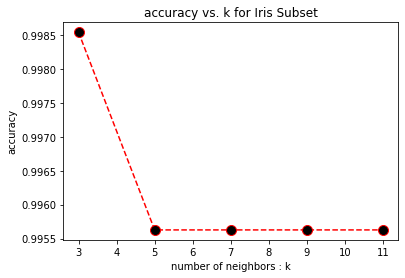

In [270]:
plt.figsize =(10 ,4)
ax = plt.gca ()
# ax.xaxis.set_major_locator ( MaxNLocator ( integer = True ))
plt.plot (range (3 ,13 ,2) , accuracy_list , color ='red', linestyle ='dashed',
marker ='o', markerfacecolor ='black', markersize =10)
plt . title ('accuracy vs. k for Iris Subset')
plt . xlabel ('number of neighbors : k')
plt . ylabel ('accuracy')
print('k = 3 is the optimal value')

In [271]:

knn_classifier = KNeighborsClassifier (n_neighbors =3)
knn_classifier.fit(X_train , Y_train.ravel())
pred_k = knn_classifier.predict(X_test)

TP = 0
FP = 0
TN = 0
FN = 0
for j in range(len(pred_k)):
    if pred_k[j] == 0 and Y_test[j] == 0:
        TP+=1
    elif pred_k[j] == 0 and Y_test[j] == 1:
        FP+=1
    elif pred_k[j] == 1 and Y_test[j] == 1:
        TN+=1
    elif pred_k[j]== 1 and Y_test[j] == 0:
        FN+=1

dic2 = {'TP':TP,'FP':FP,'TN':TN,'FN' : FN,'accuracy':(TP+TN)/len(pred_k),'TPR' :TP/(TP+FN),'TNR': TN/(TN+FP)}
result = pd.DataFrame(dic2,index = ['result'])

print(result)#question3
print('my knn classifier is better than my simple classifier')

         TP  FP   TN  FN  accuracy       TPR  TNR
result  384   0  301   1  0.998542  0.997403  1.0
my knn classifier is better than my simple classifier


In [272]:
my = [0,0,9,9]
print('my last 4 digits are : 0099')

if (my[0] > 0) and ( my[1] > 5) and ( my[2] < 8):
    print('my classifier prediction is :', 0)

else:
    print('my classifier prediction is :', 1)

knn_classifier = KNeighborsClassifier (n_neighbors =3)
knn_classifier.fit (X_train,Y_train.ravel())
prediction = knn_classifier.predict(np.asmatrix(my))
print('knn prediction is :',prediction[0]) #question3

my last 4 digits are : 0099
my classifier prediction is : 1
knn prediction is : 1


In [273]:
X_list = [data[['skewness','curtosis','entropy']].values,
          data[['variance','curtosis','entropy']].values,
          data[['variance','skewness','entropy']].values,
          data[['variance','skewness','curtosis']].values,
          data[['variance','skewness','curtosis','entropy']].values]
num = 1
for i in X_list:
    Y = data['class'].values
    scaler = StandardScaler().fit(i)
    i = scaler.transform (i)
    X_train ,X_test , Y_train , Y_test = train_test_split (i,Y, test_size =0.5 ,random_state =3)
    knn_classifier = KNeighborsClassifier (n_neighbors =3)
    knn_classifier.fit (X_train,Y_train.ravel())
    prediction = knn_classifier.predict(X_test)
    if num < 5 :
        print('drop %d th feature accuracy = %f'%(num,np.mean(prediction == Y_test)))
    elif num == 5:
        print('all feature accuracy = %f'%(np.mean(prediction == Y_test)))

    num+=1

print('accuracy did not increase compared with all 4 features are used')
print('feature 1 contributes the most to loss of accuracy')
print('feature 4 contributes the least to loss of accuracy')

#question4


drop 1 th feature accuracy = 0.959184
drop 2 th feature accuracy = 0.978134
drop 3 th feature accuracy = 0.970845
drop 4 th feature accuracy = 0.994169
all feature accuracy = 0.998542
accuracy did not increase compared with all 4 features are used
feature 1 contributes the most to loss of accuracy
feature 4 contributes the least to loss of accuracy


In [274]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler().fit(X)
X = scaler.transform (X)

X_train1 ,X_test1 , Y_train1 , Y_test1 = train_test_split (X,Y, test_size =0.5 ,random_state =4)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit (X_train1,Y_train1)
predicted = log_reg_classifier.predict(X_test1)
accuracy = np.mean(predicted == Y_test1 )

print(accuracy)

0.978134110787172


In [275]:
TP = 0
FP = 0
TN = 0
FN = 0
for j in range(len(predicted)):
    if predicted[j] == 0 and Y_test1[j] == 0:
        TP+=1
    elif predicted[j] == 0 and Y_test1[j] == 1:
        FP+=1
    elif predicted[j] == 1 and Y_test1[j] == 1:
        TN+=1
    elif predicted[j]== 1 and Y_test1[j] == 0:
        FN+=1

dic2 = {'TP':TP,'FP':FP,'TN':TN,'FN' : FN,'accuracy':(TP+TN)/len(predicted),'TPR' :TP/(TP+FN),'TNR': TN/(TN+FP)}
result = pd.DataFrame(dic2,index = ['result'])

print(result)#question2
print('my lr better than my simple classifier')
print('my lr is not better than my knn classifier')


         TP  FP   TN  FN  accuracy       TPR      TNR
result  366   3  305  12  0.978134  0.968254  0.99026
my lr better than my simple classifier
my lr is not better than my knn classifier


In [276]:

if (my[0] > 0) and ( my[1] > 5) and ( my[2] < 8):
    print('my classifier prediction is :', 0)

else:
    print('my classifier prediction is :', 1)

knn_classifier = KNeighborsClassifier (n_neighbors =3)
knn_classifier.fit (X_train,Y_train.ravel())
a = knn_classifier.predict(np.asmatrix(my))

log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit (X_train1,Y_train1)
b = log_reg_classifier.predict(np.asmatrix(my))
print('knn prediction is : ',a[0])
print('lr prediction is : ',b[0])#question5
print('lr prediction is not same as knn prediction')

my classifier prediction is : 1
knn prediction is :  1
lr prediction is :  0
lr prediction is not same as knn prediction


In [277]:
num = 1
for i in X_list:
    Y = data['class'].values
    scaler = StandardScaler().fit(i)
    i = scaler.transform (i)
    X_train ,X_test , Y_train , Y_test = train_test_split (i,Y, test_size =0.5 ,random_state =3)
    log_reg_classifier = LogisticRegression ()
    log_reg_classifier.fit (X_train,Y_train)
    prediction = log_reg_classifier.predict(X_test)
    if num < 5 :
        print('drop %d th feature accuracy = %f'%(num,np.mean(prediction == Y_test)))
    elif num == 5:
        print('all feature accuracy = %f'%(np.mean(prediction == Y_test)))

    num+=1
print('accuracy did not increase compared with all 4 features are used')
print('feature 1 contributes the most to loss of accuracy')
print('feature 4 contributes the least to loss of accuracy')
#question 6

drop 1 th feature accuracy = 0.809038
drop 2 th feature accuracy = 0.897959
drop 3 th feature accuracy = 0.877551
drop 4 th feature accuracy = 0.982507
all feature accuracy = 0.983965
accuracy did not increase compared with all 4 features are used
feature 1 contributes the most to loss of accuracy
feature 4 contributes the least to loss of accuracy
